# Heart Disease: Data exploration

**Objectives:** 

* Explore structured data using pandas
* Apply diferent statistical utils in order to understand and clean data
* Desing visualization utils using matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn");

C:\Users\pedro\AppData\Local\Temp\ipykernel_9016\2564736337.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn");


## 1. Reading data using pandas and first steps

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Number of colums, these represent the diferent characteristis/features 
data.shape[1], data.columns

(14,
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object'))

In [5]:
# Shape of the data, number of columns and rows
data.shape

(303, 14)

In [6]:
# Accesing an specific column and displaying info

data['age'].info()
data['age'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: age
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [7]:
data['thalach'].info()
data['thalach'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: thalach
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [8]:
# We can use the describe() method in the entire dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now let´s explore the target column which contains the binary ground thruth classification values (0 or 1) representing if there is hear disease or not

In [9]:
data['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: target
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [10]:
data['target'][data.target == 0].value_counts()

target
0    138
Name: count, dtype: int64

In [11]:
data['target'][data.target == 1].value_counts()

target
1    165
Name: count, dtype: int64

In [12]:
# we can use the loc() method to segment the data
pos_case = data.loc[data['target'] == 1, 'target']

In [13]:
neg_case = data.loc[data.target == 0, 'target']

In [14]:
print('Patients with positive heart disease:', len(pos_case))
print('Patients with negative heart disease:', len(neg_case))

Patients with positive heart disease: 165
Patients with negative heart disease: 138


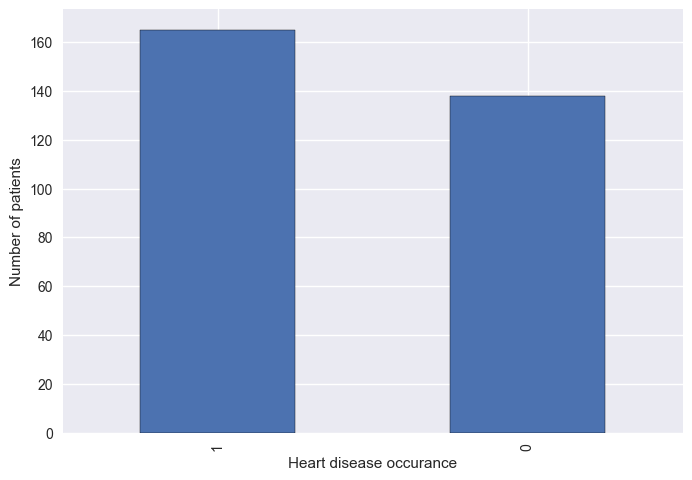

In [15]:
fig, ax = plt.subplots()
data['target'].value_counts().plot(ax=ax, kind='bar', xlabel='Heart disease occurance', 
                                ylabel='Number of patients',
                                  edgecolor='k')
plt.show()

### Using hist() method for some simple visualization utilities

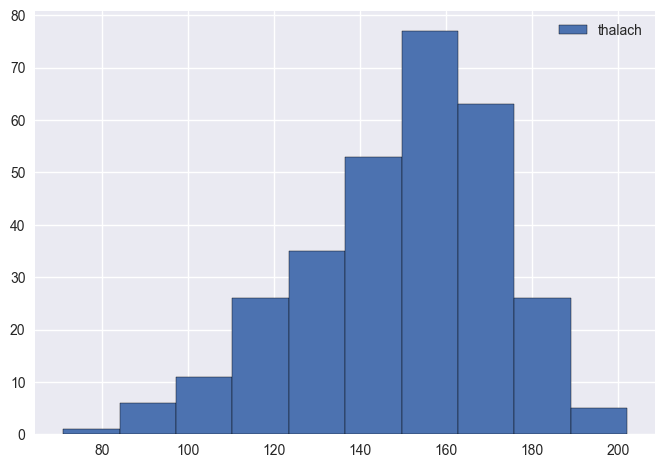

In [21]:
data['thalach'].hist(edgecolor='k', legend=True);

## Calculating correlation between features from the dataset

In [23]:
import seaborn as sns

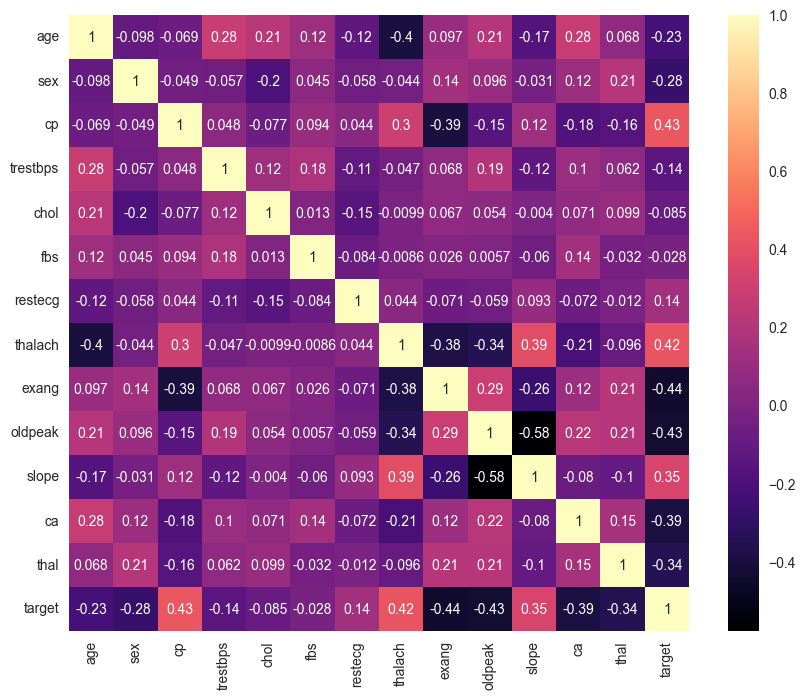

In [36]:
corr_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap="magma")
plt.show();